# LINEAR REGRESION ASSIGNMENT

##Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.


##Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

##STEP 1: IMPORTING THE REQUIRED LIBRARIES AND DATASET

In [1]:
# Importing the required libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
# Importing the data
df= pd.read_csv('/content/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()  # CHECKING THE DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### STEP 2: PREPARING AND PREPROSSING THE DATA

In [5]:
# renaming few columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

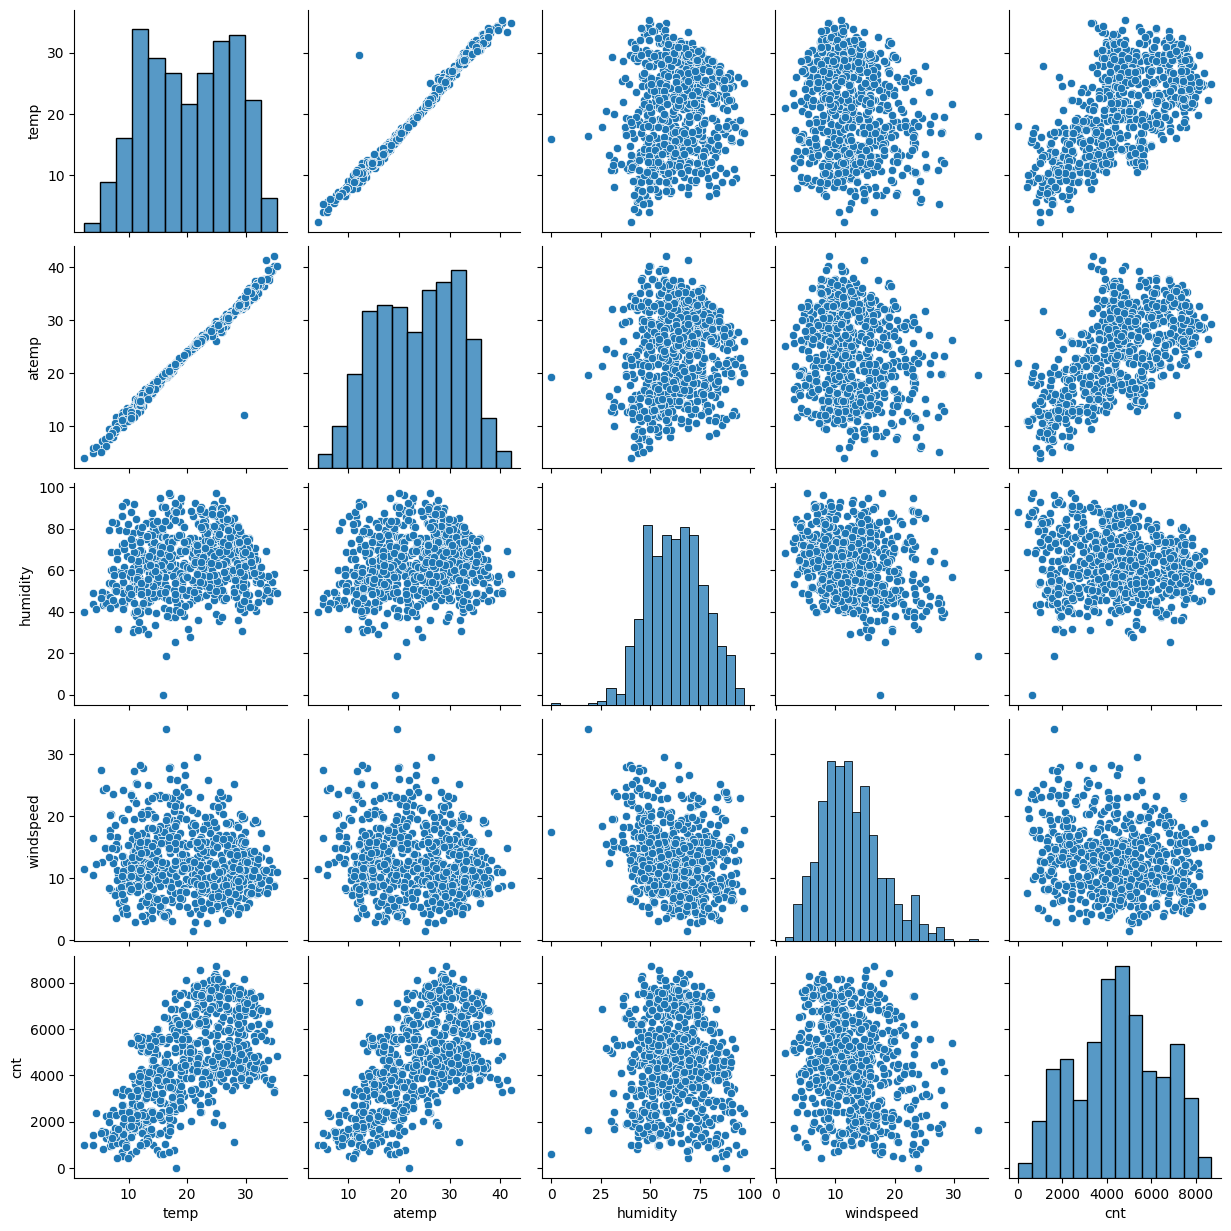

In [7]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

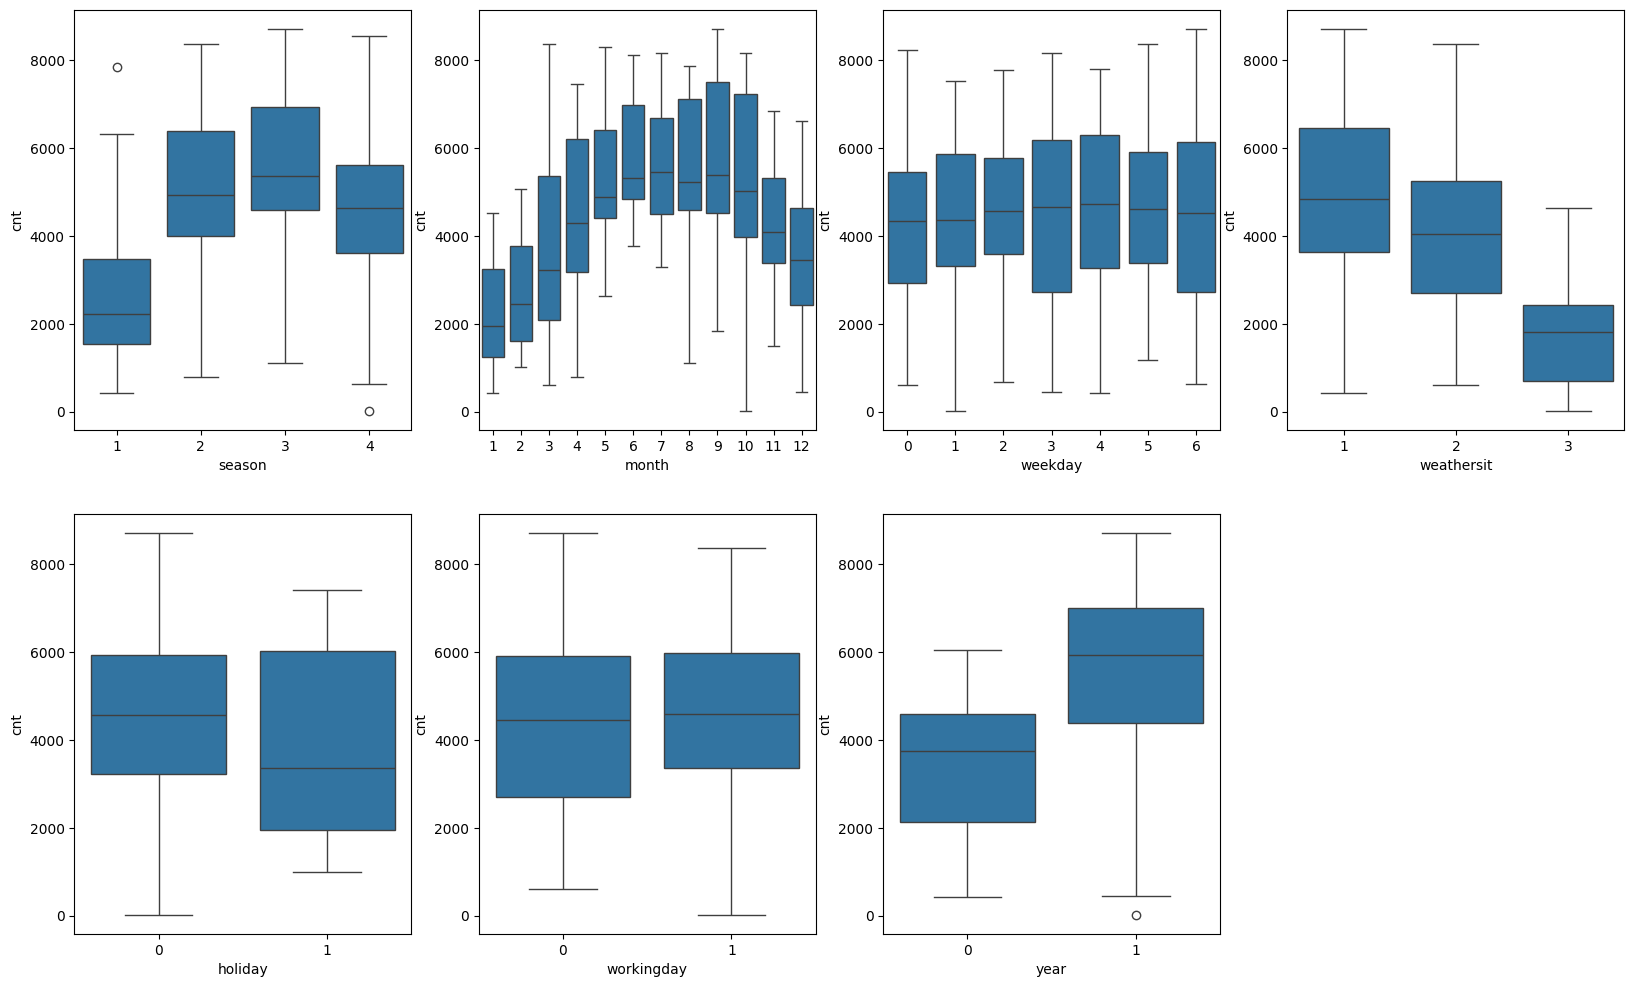

In [8]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

In [9]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x= column, y = 'cnt', data=df)
    plt.subplot(1,2,2)
    sns.barplot(x= column,y = 'cnt',data=df, hue='year',palette='Set1')
    plt.legend(labels=['0', '1'])
    plt.show()

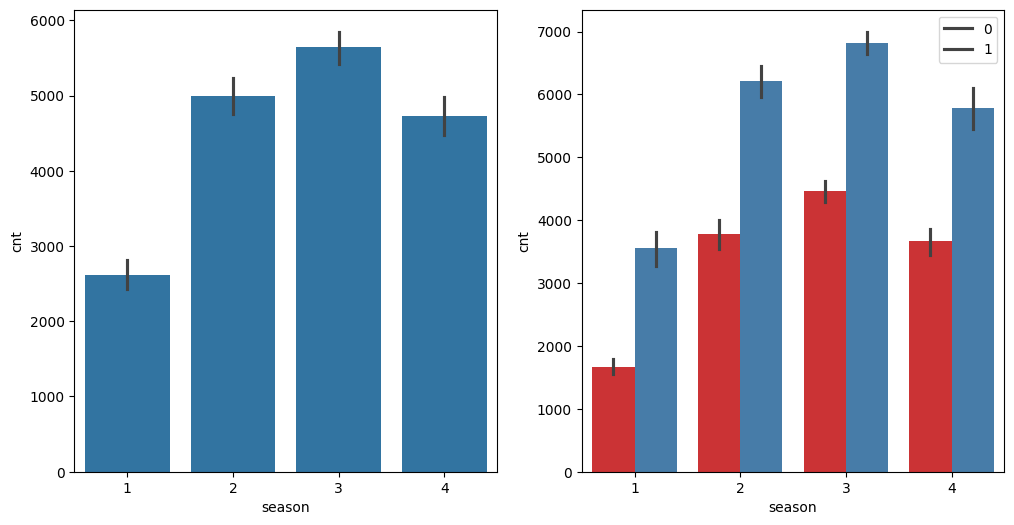

In [10]:
# plotting visualization for month column

plot_cat_columns('season')

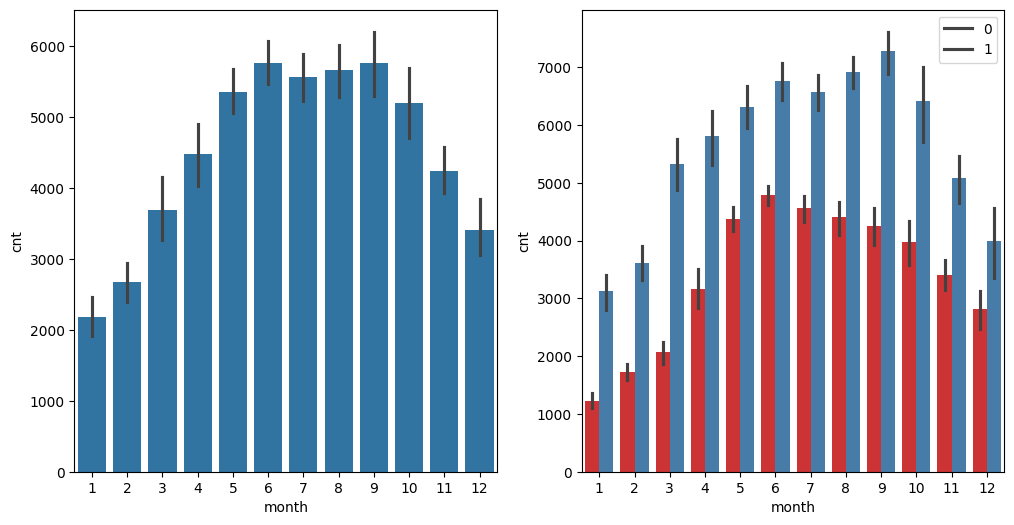

In [11]:
plot_cat_columns('month')


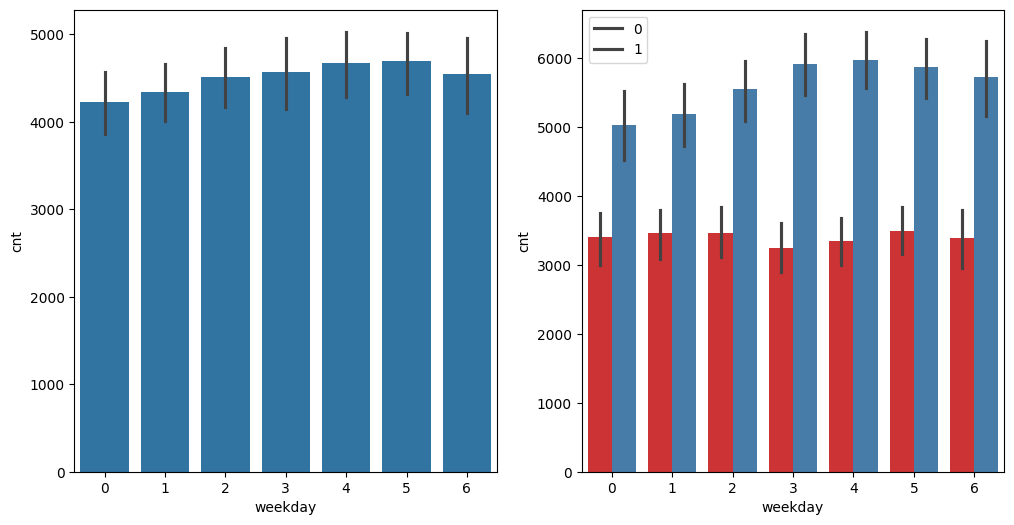

In [12]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


###STEP 3: BUILDING MODEL

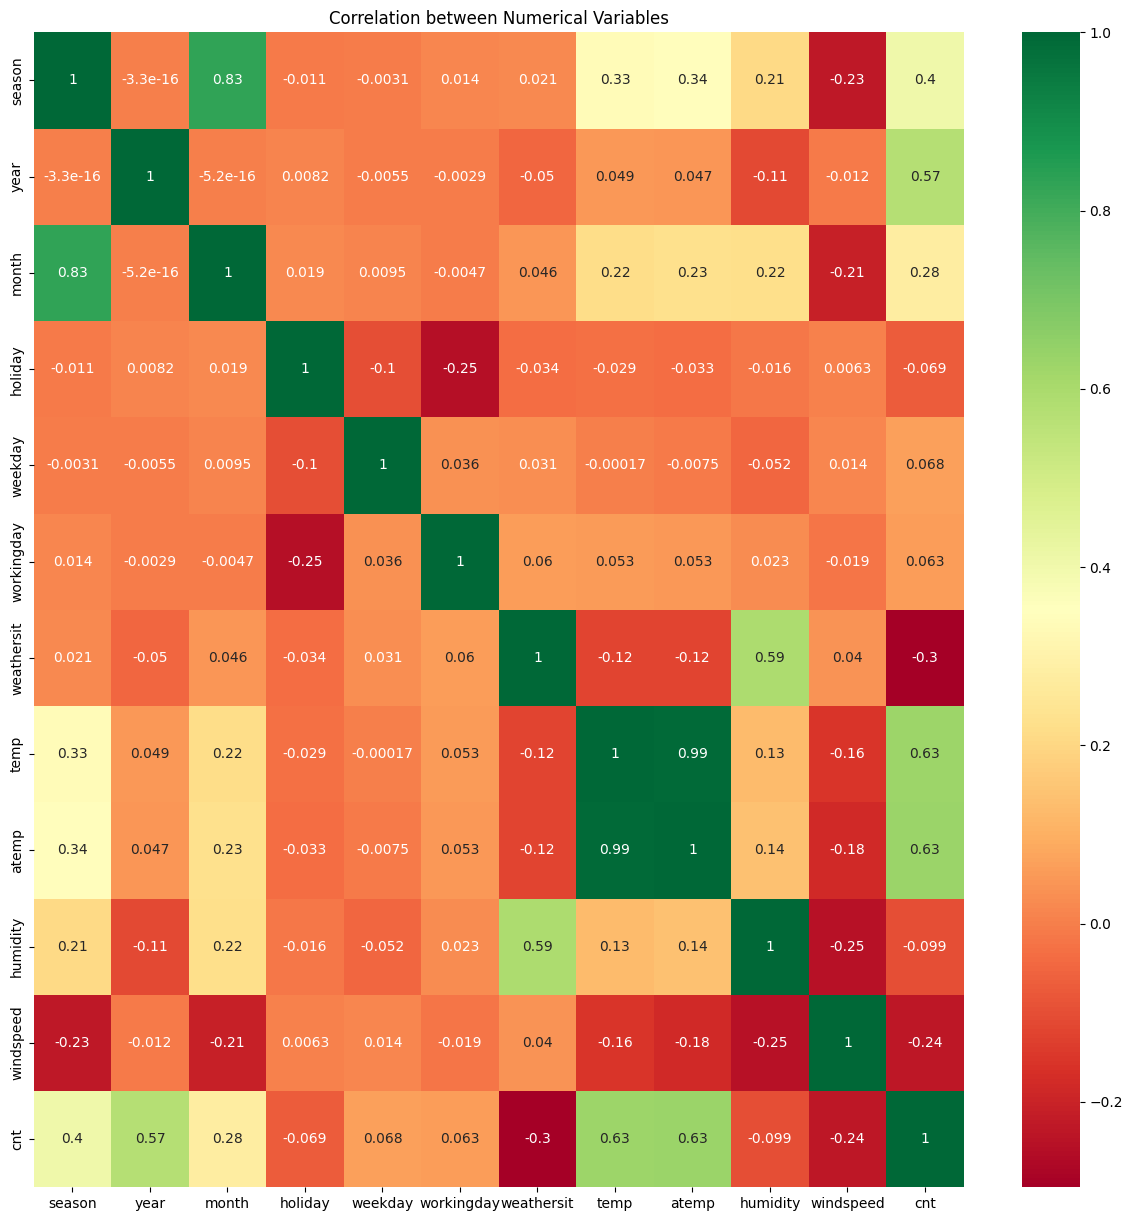

In [42]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (15,15))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, cmap="RdYlGn")
plt.title("Correlation between Numerical Variables")
plt.show()

In [14]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [15]:
# check the shape of training datatset

df_train.shape

(510, 12)

In [16]:
# check the shape of testing datatset

df_test.shape

(220, 12)

In [18]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric vars
numvar =['season','year','month','holiday','weekday','workingday','weathersit','temp','atemp','humidity','windspeed','cnt'  ]

# Fit on Data
df_train[numvar] = scaler.fit_transform(df_train[numvar])

df_train.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
576,0.666667,1.0,0.545455,0.0,0.333333,1.0,0.0,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.000000,1.0,0.181818,0.0,1.000000,0.0,0.5,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.000000,1.0,1.000000,0.0,0.000000,0.0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.333333,1.0,0.272727,0.0,1.000000,0.0,0.5,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.333333,0.0,0.272727,0.0,0.833333,1.0,0.5,0.345824,0.318819,0.751824,0.380981,0.191095


In [19]:
y_train = df_train.pop('cnt')
X_train = df_train

In [20]:
X_train.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed
576,0.666667,1.0,0.545455,0.0,0.333333,1.0,0.0,0.815169,0.766351,0.725633,0.264686
426,0.000000,1.0,0.181818,0.0,1.000000,0.0,0.5,0.442393,0.438975,0.640189,0.255342
728,0.000000,1.0,1.000000,0.0,0.000000,0.0,0.0,0.245101,0.200348,0.498067,0.663106
482,0.333333,1.0,0.272727,0.0,1.000000,0.0,0.5,0.395666,0.391735,0.504508,0.188475
111,0.333333,0.0,0.272727,0.0,0.833333,1.0,0.5,0.345824,0.318819,0.751824,0.380981


In [21]:
# Adding constant

X_train_sm = sm.add_constant(X_train)
X_train_sm = sm.add_constant(X_train_sm)

#create  model

lr= sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

# params

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     185.7
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          2.86e-168
Time:                        15:24:52   Log-Likelihood:                 454.40
No. Observations:                 510   AIC:                            -884.8
Df Residuals:                     498   BIC:                            -834.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1818      0.032      5.672      0.000       0.119       0.245
season         0.1409      0.024      5.901      0.000       0.094       0.188
year           0.2349      0.009     26.035      0.000       0.217       0.253
month         -0.0156      0.027     -0.570      0.569      -0.069       0.038
holiday       -0.0686      0.029     -2.341      0.020      -0.126      -0.011
weekday        0.0473      0.013      3.516      0.000       0.021       0.074
workingday     0.0194      0.010      1.974      0.049    9.27e-05       0.039
weathersit    -0.1581      0.021     -7.530      0.000      -0.199      -0.117
temp           0.2136      0.140      1.531      0.127      -0.061       0.488
atemp          0.2828      0.150      1.889      0.059      -0.011       0.577
humidity      -0.0972      0.042     -2.341      0.020      -0.179      -0.016
windspeed     -0.1575      0.029     -5.477      0.000      -0.214      -0.101
==============================================================================
Omnibus:                       62.779   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.597
Skew:                          -0.662   Prob(JB):                     6.58e-32
Kurtosis:                       5.237   Cond. No.                         88.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,atemp,346.93
7,temp,333.32
9,humidity,16.05
2,month,13.27
0,season,11.26
10,windspeed,3.74
5,workingday,3.14
4,weekday,3.03
6,weathersit,2.19
1,year,2.01


SINCE THE COLUMN " MONTH " HAS A P VALUE OF 0.569 DROPPING THE COLUMN

In [23]:
X = X_train.drop ('month', axis=1)

In [24]:
# Adding constant

X_train_sm = sm.add_constant(X)
X_train_sm = sm.add_constant(X_train_sm)

#create  model

lr= sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     204.5
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          2.29e-169
Time:                        15:25:03   Log-Likelihood:                 454.24
No. Observations:                 510   AIC:                            -886.5
Df Residuals:                     499   BIC:                            -839.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1806      0.032      5.651      0.000       0.118       0.243
season         0.1295      0.013      9.880      0.000       0.104       0.155
year           0.2350      0.009     26.082      0.000       0.217       0.253
holiday       -0.0694      0.029     -2.371      0.018      -0.127      -0.012
weekday        0.0469      0.013      3.490      0.001       0.020       0.073
workingday     0.0196      0.010      1.991      0.047       0.000       0.039
weathersit    -0.1571      0.021     -7.514      0.000      -0.198      -0.116
temp           0.2144      0.139      1.538      0.125      -0.060       0.488
atemp          0.2832      0.150      1.892      0.059      -0.011       0.577
humidity      -0.0997      0.041     -2.417      0.016      -0.181      -0.019
windspeed     -0.1577      0.029     -5.489      0.000      -0.214      -0.101
==============================================================================
Omnibus:                       62.112   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.702
Skew:                          -0.656   Prob(JB):                     1.70e-31
Kurtosis:                       5.224   Cond. No.                         85.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,atemp,346.93
6,temp,333.25
8,humidity,15.13
9,windspeed,3.73
0,season,3.40
4,workingday,3.14
3,weekday,3.01
5,weathersit,2.16
1,year,2.01
2,holiday,1.09


SINCE THE COLUMN " ATEMP " HAS A HIGH VIF OF 346.93, DROPPING THIS COLUMN

In [26]:
X = X.drop ('atemp', axis=1)

In [27]:
X.columns


Index(['season', 'year', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'humidity', 'windspeed'],
      dtype='object')

In [28]:
# Adding constant

X_train_sm = sm.add_constant(X)
X_train_sm = sm.add_constant(X_train_sm)

#create  model

lr= sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     225.6
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          8.77e-170
Time:                        15:25:21   Log-Likelihood:                 452.41
No. Observations:                 510   AIC:                            -884.8
Df Residuals:                     500   BIC:                            -842.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1857      0.032      5.816      0.000       0.123       0.248
season         0.1306      0.013      9.945      0.000       0.105       0.156
year           0.2350      0.009     26.008      0.000       0.217       0.253
holiday       -0.0719      0.029     -2.452      0.015      -0.129      -0.014
weekday        0.0454      0.013      3.380      0.001       0.019       0.072
workingday     0.0194      0.010      1.972      0.049    7.29e-05       0.039
weathersit    -0.1596      0.021     -7.626      0.000      -0.201      -0.118
temp           0.4751      0.022     21.791      0.000       0.432       0.518
humidity      -0.0937      0.041     -2.271      0.024      -0.175      -0.013
windspeed     -0.1669      0.028     -5.877      0.000      -0.223      -0.111
==============================================================================
Omnibus:                       55.179   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.704
Skew:                          -0.595   Prob(JB):                     2.27e-27
Kurtosis:                       5.087   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,humidity,14.34
6,temp,7.90
8,windspeed,3.65
0,season,3.39
4,workingday,3.14
3,weekday,3.00
5,weathersit,2.14
1,year,2.01
2,holiday,1.09


SINCE HUMIDITY HAS A HIGH VIF OF 14.34, DROPPING THE COLUMN

In [30]:
X = X.drop ('humidity', axis=1)

In [31]:
# Adding constant

X_train_sm = sm.add_constant(X)
X_train_sm = sm.add_constant(X_train_sm)

#create  model

lr= sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     251.1
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          6.91e-170
Time:                        15:25:32   Log-Likelihood:                 449.80
No. Observations:                 510   AIC:                            -881.6
Df Residuals:                     501   BIC:                            -843.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1285      0.020      6.528      0.000       0.090       0.167
season         0.1268      0.013      9.695      0.000       0.101       0.152
year           0.2370      0.009     26.263      0.000       0.219       0.255
holiday       -0.0721      0.029     -2.449      0.015      -0.130      -0.014
weekday        0.0485      0.013      3.611      0.000       0.022       0.075
workingday     0.0198      0.010      2.004      0.046       0.000       0.039
weathersit    -0.1887      0.017    -11.383      0.000      -0.221      -0.156
temp           0.4663      0.022     21.644      0.000       0.424       0.509
windspeed     -0.1481      0.027     -5.430      0.000      -0.202      -0.095
==============================================================================
Omnibus:                       54.070   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.448
Skew:                          -0.592   Prob(JB):                     3.14e-26
Kurtosis:                       5.032   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,temp,5.82
7,windspeed,3.31
0,season,3.15
4,workingday,2.92
3,weekday,2.85
1,year,2.00
5,weathersit,1.54
2,holiday,1.07


SINCE ALL THE COLUMNS HAVE A VIF UNDER 6, FINALISING THIS MODEL

###STEP 4: RESIDUAL ANALYSIS

In [33]:
y_train_pred = lr_model.predict(X_train_sm)

<Axes: ylabel='Density'>

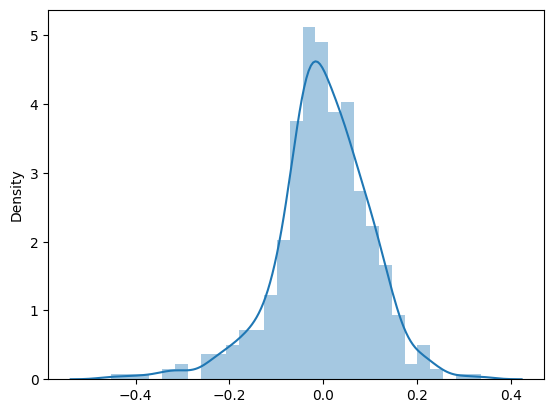

In [34]:
res = y_train - y_train_pred
sns.distplot(res)

##STEP 5: PREDICTIONS

In [35]:
#Create a list of numeric vars
numvar =['season','year','month','holiday','weekday','workingday','weathersit','temp','atemp','humidity','windspeed','cnt'  ]

# Fit on Data
df_test[numvar] = scaler.transform(df_test[numvar])

df_test.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
184,0.666667,0.0,0.545455,1.0,0.166667,0.0,0.5,0.831783,0.769660,0.657364,0.084219,0.692706
535,0.333333,1.0,0.454545,0.0,0.500000,1.0,0.0,0.901354,0.842587,0.610133,0.153728,0.712034
299,1.000000,0.0,0.818182,0.0,0.666667,1.0,0.5,0.511964,0.496145,0.837699,0.334206,0.303382
221,0.666667,0.0,0.636364,0.0,0.500000,1.0,0.0,0.881625,0.795343,0.437098,0.339570,0.547400
152,0.333333,0.0,0.454545,0.0,0.666667,1.0,0.0,0.817246,0.741471,0.314298,0.537414,0.569029


In [36]:
df_test.describe()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.487879,0.481818,0.499174,0.036364,0.502273,0.700000,0.186364,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.370602,0.500809,0.311120,0.187620,0.330843,0.459303,0.269102,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.272727,0.000000,0.166667,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.333333,0.000000,0.454545,0.000000,0.500000,1.000000,0.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.666667,1.000000,0.727273,0.000000,0.833333,1.000000,0.500000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [37]:
y_test= df_test.pop('cnt')
X_test = df_test

In [38]:
#add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed
184,1.0,0.666667,0.0,0.545455,1.0,0.166667,0.0,0.5,0.831783,0.769660,0.657364,0.084219
535,1.0,0.333333,1.0,0.454545,0.0,0.500000,1.0,0.0,0.901354,0.842587,0.610133,0.153728
299,1.0,1.000000,0.0,0.818182,0.0,0.666667,1.0,0.5,0.511964,0.496145,0.837699,0.334206
221,1.0,0.666667,0.0,0.636364,0.0,0.500000,1.0,0.0,0.881625,0.795343,0.437098,0.339570
152,1.0,0.333333,0.0,0.454545,0.0,0.666667,1.0,0.0,0.817246,0.741471,0.314298,0.537414


In [39]:
X_test_sm = X_test_sm.drop (['month','atemp','humidity'], axis = 1)
X_test_sm.head()

,const,season,year,holiday,weekday,workingday,weathersit,temp,windspeed
184,1.0,0.666667,0.0,1.0,0.166667,0.0,0.5,0.831783,0.084219
535,1.0,0.333333,1.0,0.0,0.500000,1.0,0.0,0.901354,0.153728
299,1.0,1.000000,0.0,0.0,0.666667,1.0,0.5,0.511964,0.334206
221,1.0,0.666667,0.0,0.0,0.500000,1.0,0.0,0.881625,0.339570
152,1.0,0.333333,0.0,0.0,0.666667,1.0,0.0,0.817246,0.537414


In [40]:
#predict for testing
y_test_pred = lr_model.predict(X_test_sm)

In [41]:
# evaluate
r2_score (y_true = y_test, y_pred = y_test_pred)

0.7792968888520048

SINCE THE R2 SCORE OF TRAINING MODEL AND PREDICTED MODEL ARE SIMILAR,WE CAN CONCLUDE THAT THE MODEL WE CREATED IS SUCESSFUL